<a href="https://colab.research.google.com/github/christopherjneelankavil/horses_and_humans_detection_cnn/blob/main/horses_and_humans_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
(train_data, test_data), data_info = tfds.load(
    'horses_or_humans',
    split = ['train','test'],
    as_supervised = True,
    with_info = True,
    shuffle_files = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.97RKZP_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.97RKZP_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [4]:
print(data_info.features)

FeaturesDict({
    'image': Image(shape=(300, 300, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})


In [5]:
print(train_data.element_spec)

(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [6]:
print(test_data.element_spec)

(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [7]:
print(data_info.splits['train'].num_examples,data_info.splits['test'].num_examples)

1027 256


In [8]:
for image, label in train_data.take(5):
    print(image)
    print(label.numpy())

tf.Tensor(
[[[ 53  55  45]
  [ 46  47  40]
  [ 39  40  36]
  ...
  [ 24  25  24]
  [ 21  23  21]
  [ 19  21  20]]

 [[ 41  40  34]
  [ 49  48  42]
  [ 54  53  48]
  ...
  [ 18  20  19]
  [ 16  18  16]
  [ 16  18  16]]

 [[ 33  29  28]
  [ 50  47  42]
  [ 62  58  53]
  ...
  [ 17  19  17]
  [ 15  16  14]
  [ 14  15  13]]

 ...

 [[160 143 125]
  [162 147 129]
  [142 128 109]
  ...
  [144 124 106]
  [141 121 104]
  [161 141 122]]

 [[142 125 107]
  [155 134 115]
  [153 132 113]
  ...
  [149 129 113]
  [156 134 115]
  [163 142 123]]

 [[120 101  85]
  [123 103  87]
  [119 101  84]
  ...
  [158 136 118]
  [163 139 120]
  [170 149 129]]], shape=(300, 300, 3), dtype=uint8)
0
tf.Tensor(
[[[255 227 204]
  [253 226 203]
  [251 223 200]
  ...
  [128 121  88]
  [122 112  78]
  [108  96  57]]

 [[254 227 203]
  [252 224 201]
  [252 224 203]
  ...
  [119 109  81]
  [116 104  79]
  [105  94  70]]

 [[252 223 199]
  [251 223 200]
  [253 226 204]
  ...
  [106  96  76]
  [102  93  74]
  [106  95  80]]


In [9]:
# covert shape to 256 x 256 x 3

IMAGE_SIZE = 256

In [12]:
def preprocess(image, label):
    image = tf.image.resize(image, size = (IMAGE_SIZE, IMAGE_SIZE))
    image = tf.cast(image, dtype = tf.float32) / 255.0
    return image, label

In [13]:
BATCH_SIZE = 32

ds_train = train_data.map(preprocess, num_parallel_calls = tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = test_data.map(preprocess, num_parallel_calls = tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [14]:
#model

model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, 1, activation = 'relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 5, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.build(input_shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))

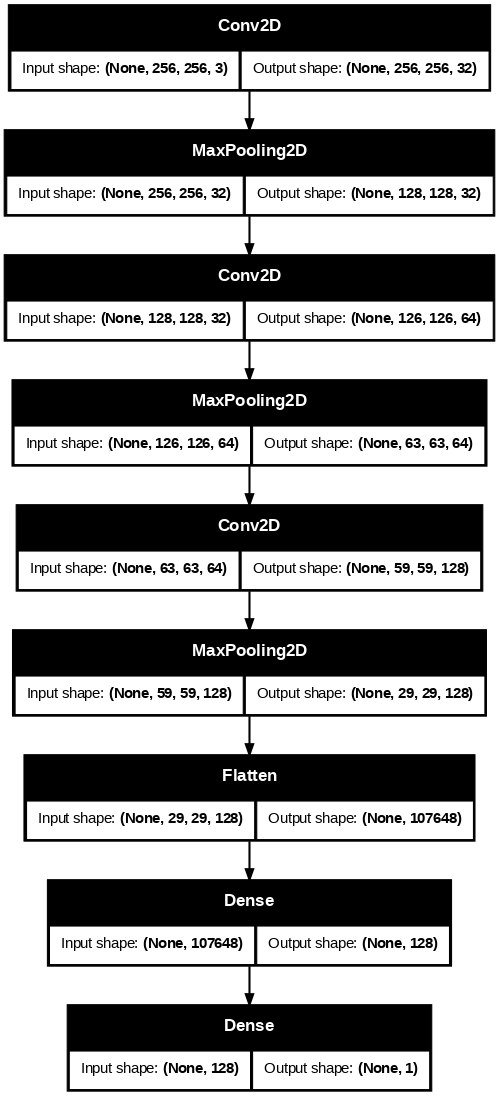

In [16]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 75)

In [17]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs = 2
)

print(history)


Epoch 1/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 377ms/step - accuracy: 0.6160 - loss: 1.5752 - val_accuracy: 0.8828 - val_loss: 0.2839
Epoch 2/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9045 - loss: 0.2573 - val_accuracy: 0.8555 - val_loss: 1.1176


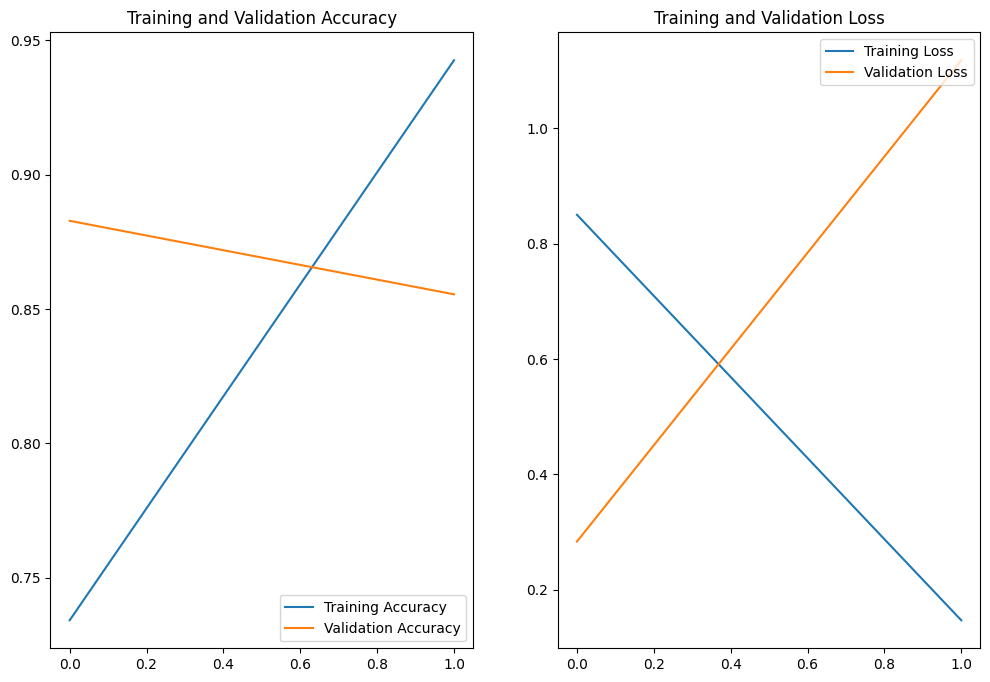

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,008,261 (160.25 MB)

 Trainable params: 14,002,753 (53.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,005,508 (106.83 MB)

In [33]:
wrong_predictions = 0

for image, label in test_data:
    preprocessed_image, _ = preprocess(image, label)
    x = model.predict(tf.expand_dims(preprocessed_image, axis=0))
    predicted_class = 1 if x > 0.5 else 0

    if(predicted_class != label.numpy()):
        wrong_predictions += 1

print(f"Total predictions : {len(test_data)}\nWrong predictions : {wrong_predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━

In [37]:
img_path = '/content/horse.jpg'
img_raw = tf.io.read_file(img_path)
horse_img = tf.image.decode_image(img_raw)
print(horse_img)

tf.Tensor(
[[[ 98  88  61]
  [ 98  88  61]
  [ 98  88  61]
  ...
  [228 181 109]
  [230 183 111]
  [233 186 114]]

 [[ 98  88  61]
  [ 98  88  61]
  [ 99  89  62]
  ...
  [227 180 108]
  [229 182 110]
  [231 184 112]]

 [[ 98  89  60]
  [ 99  90  61]
  [ 99  90  61]
  ...
  [225 178 106]
  [228 181 109]
  [230 183 111]]

 ...

 [[  0   3   0]
  [  0   3   0]
  [  0   2   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   3   0]
  [  0   3   0]
  [  0   3   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   3   0]
  [  0   3   0]
  [  0   3   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]], shape=(3840, 5760, 3), dtype=uint8)


In [40]:
preprocessed_image = preprocess(horse_img, 0)[0]
print(preprocessed_image.shape)

(256, 256, 3)


In [41]:
model.predict(tf.expand_dims(preprocessed_image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.00916133]], dtype=float32)

In [44]:
img_path = '/content/human.jpg'
raw_img = tf.io.read_file(img_path)
human_img = tf.image.decode_image(raw_img)
print(human_img)

tf.Tensor(
[[[167 169 164]
  [167 169 164]
  [168 170 165]
  ...
  [169 171 168]
  [168 170 167]
  [168 170 167]]

 [[167 169 164]
  [167 169 164]
  [168 170 165]
  ...
  [169 171 168]
  [169 171 168]
  [171 173 170]]

 [[166 168 163]
  [167 169 164]
  [168 170 165]
  ...
  [166 168 165]
  [168 170 167]
  [171 173 170]]

 ...

 [[185 186 181]
  [181 182 177]
  [179 180 175]
  ...
  [174 174 172]
  [175 175 173]
  [178 178 176]]

 [[187 188 183]
  [185 186 181]
  [185 186 181]
  ...
  [174 174 172]
  [174 174 172]
  [179 179 177]]

 [[186 187 182]
  [187 188 183]
  [189 190 185]
  ...
  [174 174 172]
  [174 174 172]
  [179 179 177]]], shape=(640, 640, 3), dtype=uint8)


In [45]:
preprocessed_image = preprocess(human_img, 1)[0]

In [46]:
model.predict(tf.expand_dims(preprocessed_image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.00099382]], dtype=float32)